# Andria Beridze
# ID: 01905049812
# I certify this work is my own
# date: 12/11/2025

## Task 1: Matplotlib Fundamentals

### Part A: Individual Plot Types 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

student_df = pd.read_csv('student_performance.csv')

pd.set_option('display.max_columns', None)
student_df.head()



Student_ID  Gender  Age        Major       Year  Previous_GPA  Current_GPA  \
0    STU0001    Male   23     Business     Junior          3.73         2.60   
1    STU0002  Female   24     Business     Junior          2.96         2.70   
2    STU0003  Female   18  Mathematics  Sophomore          2.11         1.97   
3    STU0004  Female   18  Mathematics  Sophomore          3.05         2.67   
4    STU0005    Male   18  Engineering  Sophomore          2.02         1.84   

   Study_Hours_Per_Week  Attendance_Rate  Mathematics_Score  \
0                   4.6             87.9               80.9   
1                  11.4             88.7               72.9   
2                   5.4             72.4               47.6   
3                  18.9             72.2               65.3   
4                  10.0             60.4               49.3   

   Programming_Score  Statistics_Score  English_Score  Science_Score  \
0               58.1              56.1           74.9           55.1   
1               68.1              55.5           66.3           75.1   
2               54.5              51.1           52.7           40.9   
3               65.0              68.5           62.8           71.9   
4               51.3              36.5           49.5           43.8   

   Midterm_Average  Final_Average  Assignment_Submission_Rate  \
0             65.0           73.0                       100.0   
1             67.6           68.2                        61.8   
2             49.4           43.2                        60.7   
3             66.7           59.2                        52.8   
4             46.1           49.4                        65.7   

   Late_Submissions  Library_Visits  Extracurricular_Hours  \
0                 0              17                    4.6   
1                 3              19                    2.4   
2                 1               9                    5.8   
3                 3               4                    0.8   
4                 7              13                    4.9   

   Part_Time_Work_Hours  Sleep_Hours  Distance_From_Campus  Internet_Quality  \
0                     5          6.2                   3.4                 4   
1                    10          8.5                  17.5                 3   
2                     5          7.2                   8.1                 5   
3                     0          6.8                  15.3                 3   
4                     0          6.2                   3.6                 3   

   Has_Scholarship  Passed   Academic_Status  
0            False    True     Good Standing  
1             True    True     Good Standing  
2            False   False  Academic Warning  
3            False    True     Good Standing  
4            False   False  Academic Warning

#### 1. Line Plot:

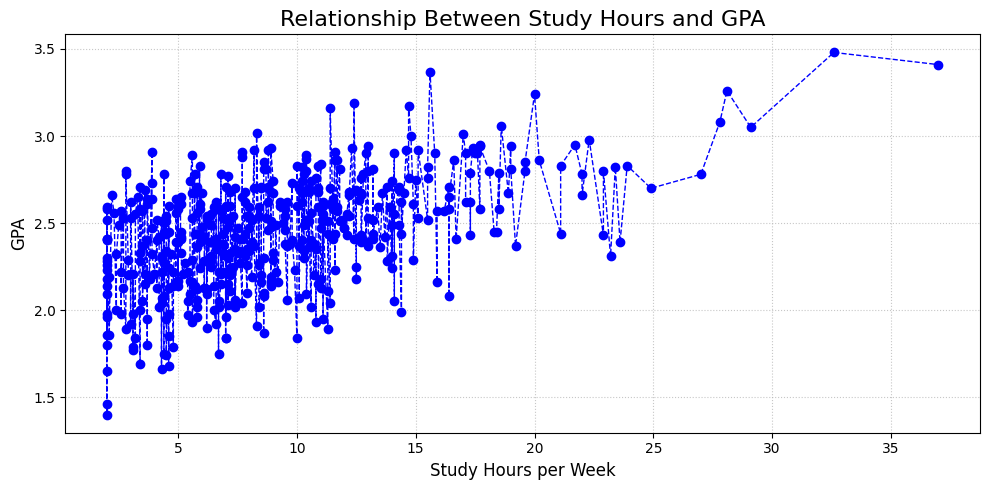

In [29]:
# Sort data by study hours
sorted_df = student_df.sort_values(by='Study_Hours_Per_Week')

plt.figure(figsize=(10, 5))
plt.plot(
    sorted_df['Study_Hours_Per_Week'],
    sorted_df['Current_GPA'],
    color='blue',
    linestyle='--',
    marker='o',
    linewidth=1
)


plt.title('Relationship Between Study Hours and GPA', fontsize=16)
plt.xlabel('Study Hours per Week', fontsize=12)
plt.ylabel('GPA', fontsize=12)

plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

#### 2. Scatter Plot:

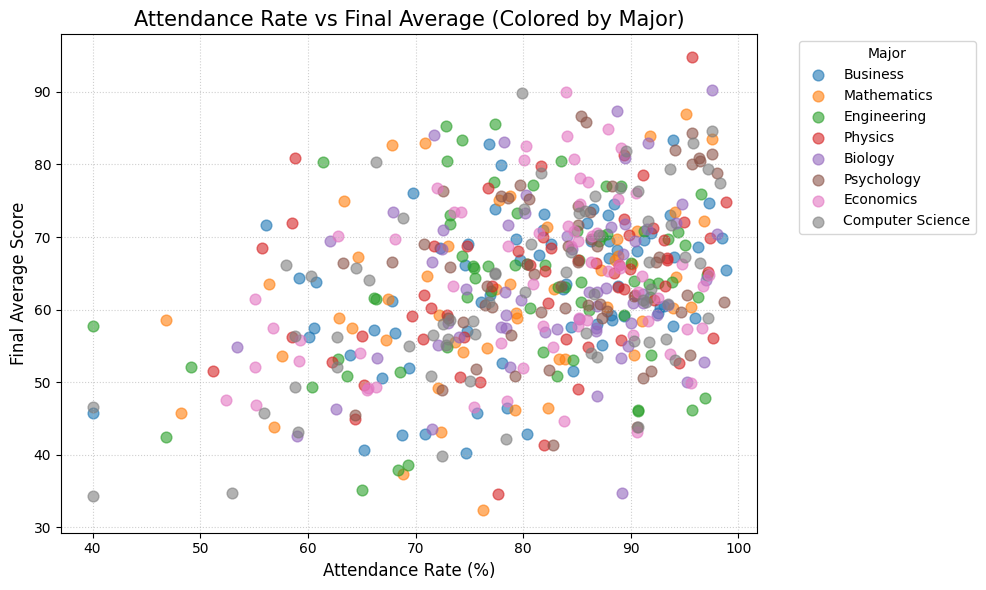

In [30]:
plt.figure(figsize=(10, 6))

majors = student_df['Major'].unique()

for major in majors:
    subset = student_df[student_df['Major'] == major]
    plt.scatter(
        subset['Attendance_Rate'],
        subset['Final_Average'],
        alpha=0.6,                
        s=60,                     
        label=major              
    )

plt.title('Attendance Rate vs Final Average (Colored by Major)', fontsize=15)
plt.xlabel('Attendance Rate (%)', fontsize=12)
plt.ylabel('Final Average Score', fontsize=12)

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title="Major", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### 3. Bar Chart:

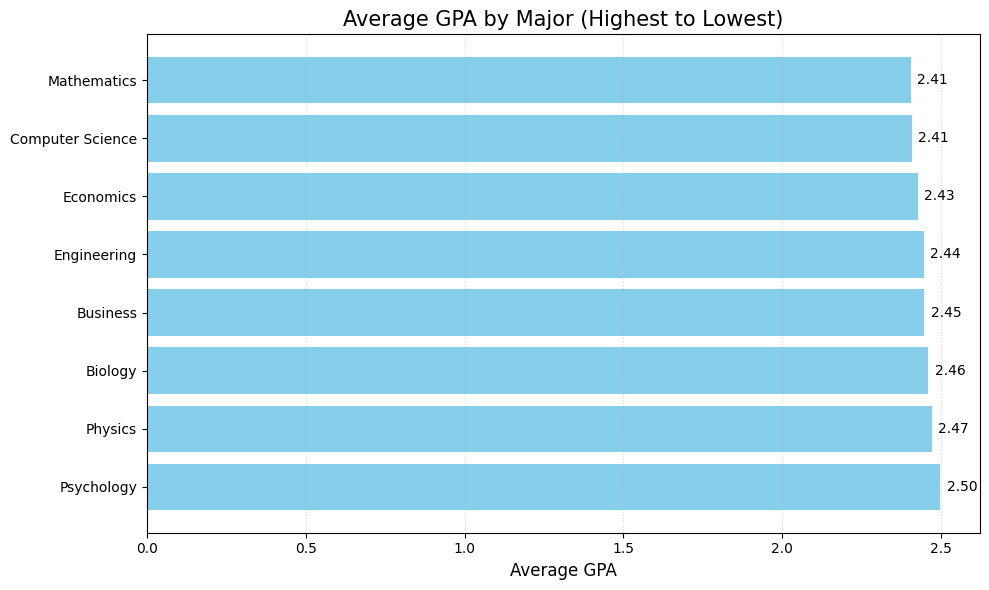

In [31]:
avg_gpa = student_df.groupby("Major")["Current_GPA"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

plt.barh(avg_gpa.index, avg_gpa.values, color="skyblue")

plt.xlabel("Average GPA", fontsize=12)
plt.title("Average GPA by Major (Highest to Lowest)", fontsize=15)
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Add value labels
for index, value in enumerate(avg_gpa.values):
    plt.text(
        value + 0.02,               # position slightly to the right
        index,                      # vertical position
        f"{value:.2f}",             # formatted GPA
        va="center"                 # vertically centered
    )

plt.tight_layout()
plt.show()

#### 4. Histogram:

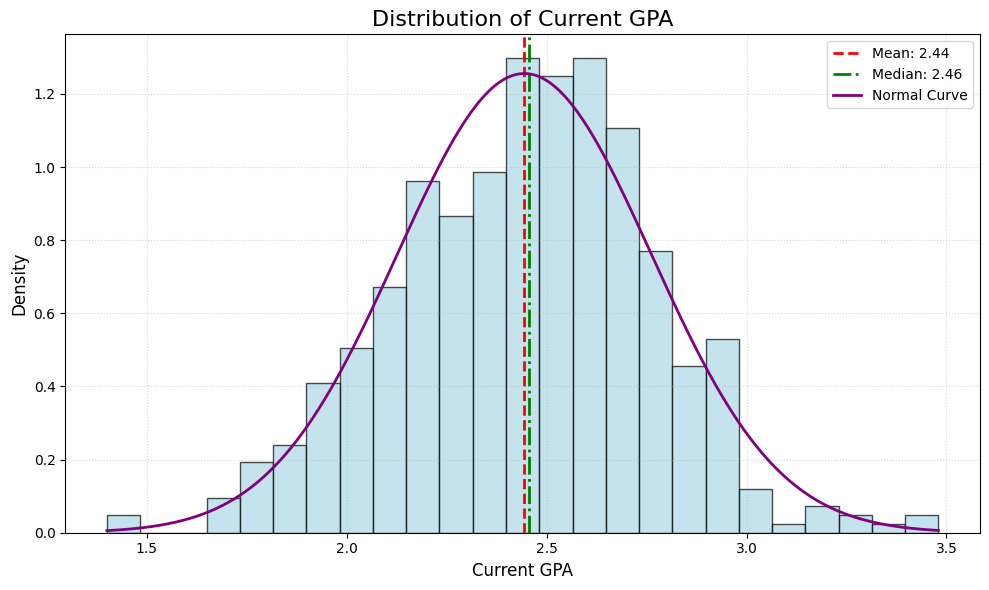

In [32]:
gpa = student_df["Current_GPA"]

plt.figure(figsize=(10, 6))

count, bins, _ = plt.hist(
    gpa,
    bins=25,
    color="lightblue",
    edgecolor="black",
    alpha=0.7,
    density=True
)

mean_val = gpa.mean()
median_val = gpa.median()
std_val = gpa.std()

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.2f}")


# Generate x-values across the range of GPA
x = np.linspace(gpa.min(), gpa.max(), 300)

normal_curve = (1 / (std_val * np.sqrt(2 * np.pi))) * np.exp(
    -0.5 * ((x - mean_val) / std_val) ** 2
)

plt.plot(x, normal_curve, color="purple", linewidth=2, label="Normal Curve")


plt.title("Distribution of Current GPA", fontsize=16)
plt.xlabel("Current GPA", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True, linestyle=":", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### 5. Box Plot:

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_46075/1883262430.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(course_scores.values, labels=course_columns, showfliers=True)


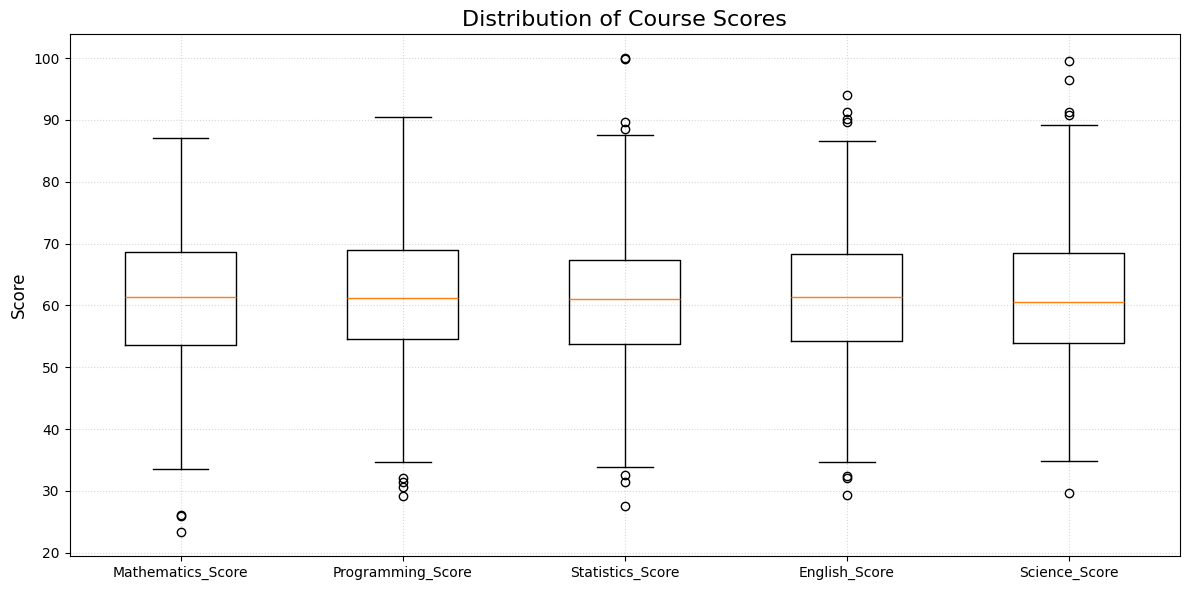

In [33]:
course_columns = [
    "Mathematics_Score",
    "Programming_Score",
    "Statistics_Score",
    "English_Score",
    "Science_Score"
]

course_scores = student_df[course_columns]

plt.figure(figsize=(12, 6))

plt.boxplot(course_scores.values, labels=course_columns, showfliers=True)

plt.title("Distribution of Course Scores", fontsize=16)
plt.ylabel("Score", fontsize=12)


plt.grid(True, linestyle=":", alpha=0.5)

plt.tight_layout()
plt.savefig("course_scores_distribution_plot.png", dpi=300, bbox_inches="tight")
    
plt.show()

### Part B: Subplots and Layout

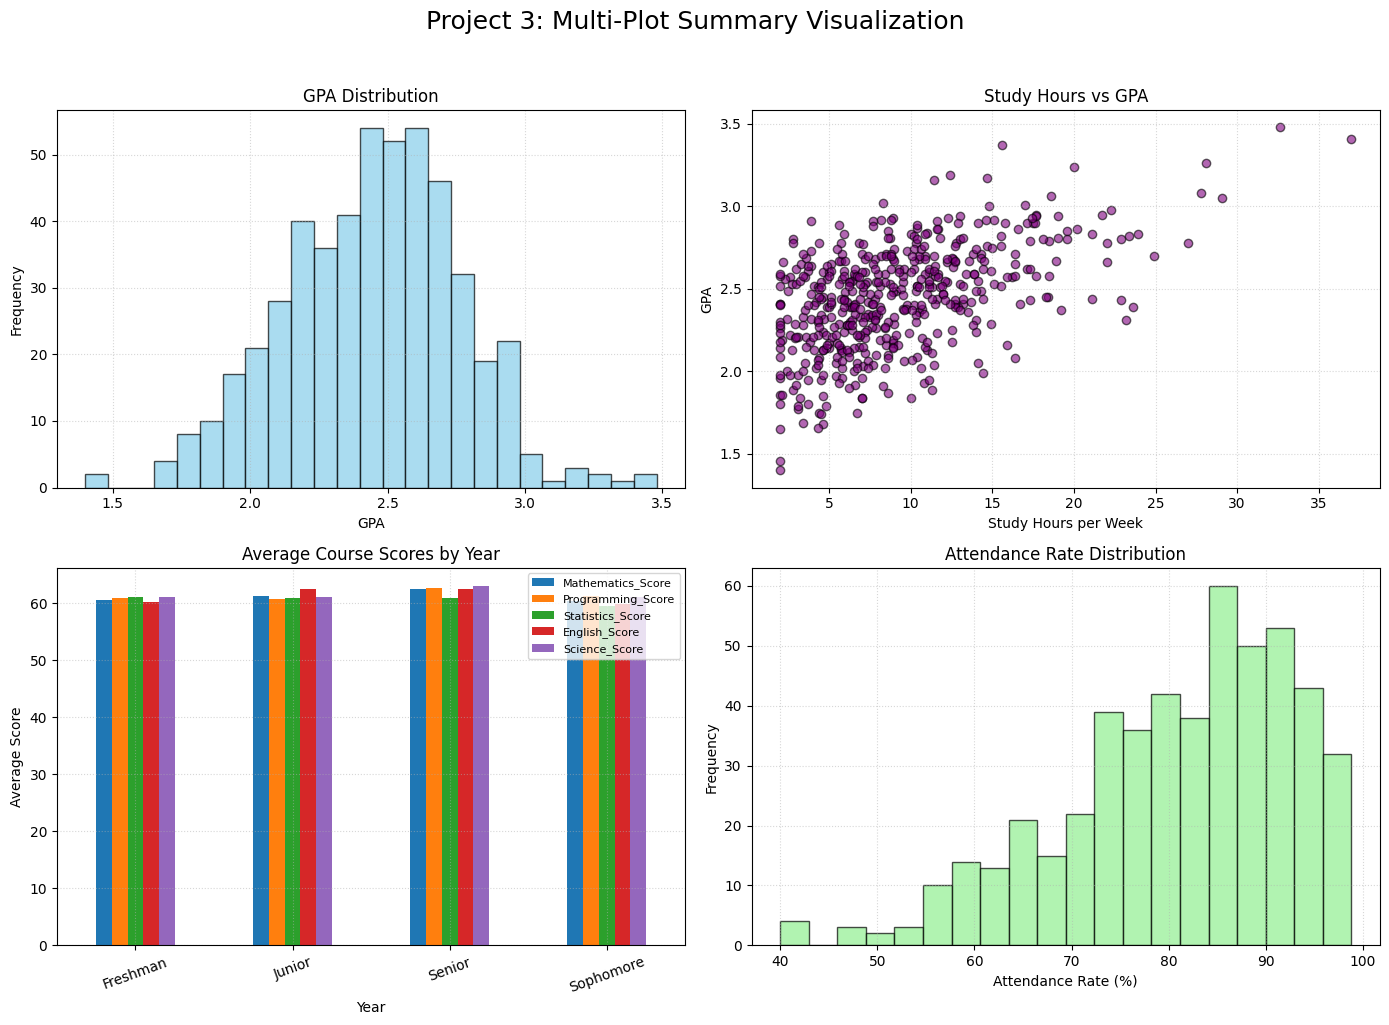

In [34]:
gpa = student_df["Current_GPA"]
study_hours = student_df["Study_Hours_Per_Week"]
attendance = student_df["Attendance_Rate"]

avg_scores_by_year = student_df.groupby("Year")[
    ["Mathematics_Score", "Programming_Score", "Statistics_Score", "English_Score", "Science_Score"]
].mean()

fig = plt.figure(figsize=(14, 10))
fig.suptitle("Project 3: Multi-Plot Summary Visualization", fontsize=18, y=1.02)

# GPA Distribution Histogram
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(gpa, bins=25, color="skyblue", edgecolor="black", alpha=0.7)
ax1.set_title("GPA Distribution")
ax1.set_xlabel("GPA")
ax1.set_ylabel("Frequency")
ax1.grid(True, linestyle=":", alpha=0.5)

# Study Hours vs GPA Scatter
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(study_hours, gpa, alpha=0.6, color="purple", edgecolor="black")
ax2.set_title("Study Hours vs GPA")
ax2.set_xlabel("Study Hours per Week")
ax2.set_ylabel("GPA")
ax2.grid(True, linestyle=":", alpha=0.5)

# Average Scores by Year (Bar Chart)
ax3 = fig.add_subplot(2, 2, 3)

avg_scores_by_year.plot(kind="bar", ax=ax3)

ax3.set_title("Average Course Scores by Year")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Score")
ax3.legend(loc="upper right", fontsize=8)
ax3.grid(True, linestyle=":", alpha=0.5)

plt.setp(ax3.get_xticklabels(), rotation=20)

# Attendance Distribution Histogram
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(attendance, bins=20, color="lightgreen", edgecolor="black", alpha=0.7)
ax4.set_title("Attendance Rate Distribution")
ax4.set_xlabel("Attendance Rate (%)")
ax4.set_ylabel("Frequency")
ax4.grid(True, linestyle=":", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("gpa_distribution_plot.png", dpi=300, bbox_inches="tight")
    

plt.show()


## Task 2: Seaborn & Statistical Analysis

### Part A: Distribution Analysis 

#### 1. Distribution Plot:

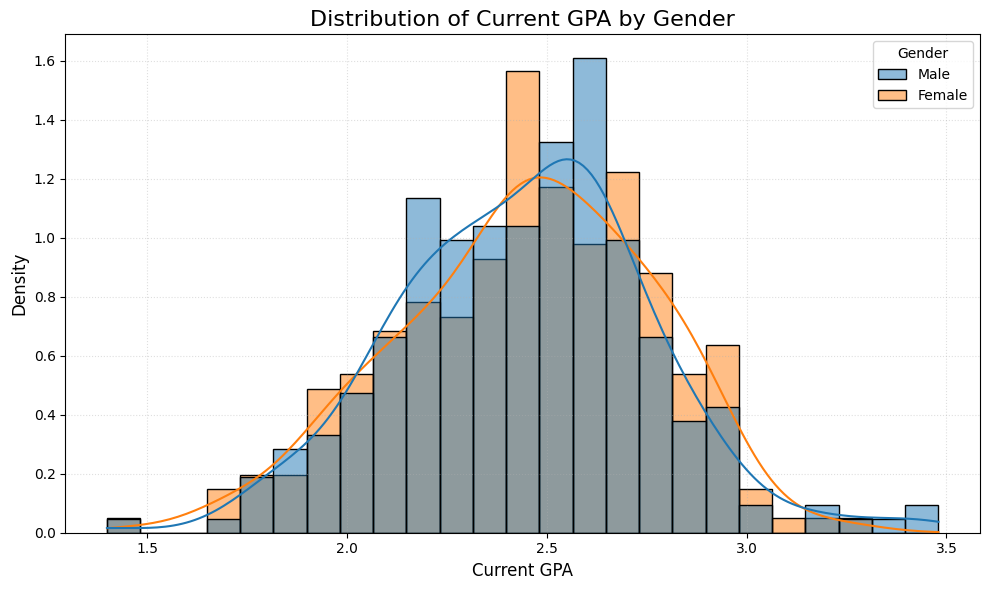

In [36]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=student_df,
    x="Current_GPA",
    hue="Gender",            # compare Male vs Female
    bins=25,
    kde=True,                # show KDE curve
    stat="density",
    common_norm=False,       # allows separate density curves
    alpha=0.5
)

plt.title("Distribution of Current GPA by Gender", fontsize=16)
plt.xlabel("Current GPA", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()


#### 2. Violin Plot:

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_46075/3755805228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


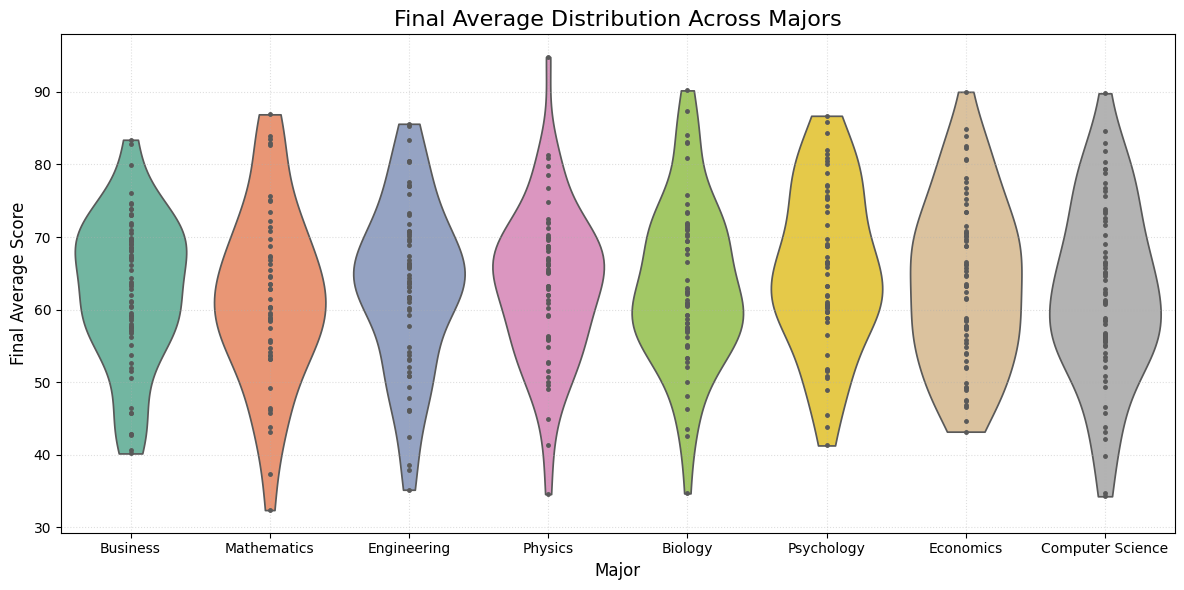

In [38]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=student_df,
    x="Major",
    y="Final_Average",
    palette="Set2",
    inner="points",      # show individual data points inside violins
    cut=0                # prevents violins from extending beyond data range
)

plt.title("Final Average Distribution Across Majors", fontsize=16)
plt.xlabel("Major", fontsize=12)
plt.ylabel("Final Average Score", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.4)

plt.tight_layout()
plt.show()


#### 3. Box Plot with Seaborn:

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_46075/1560814158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


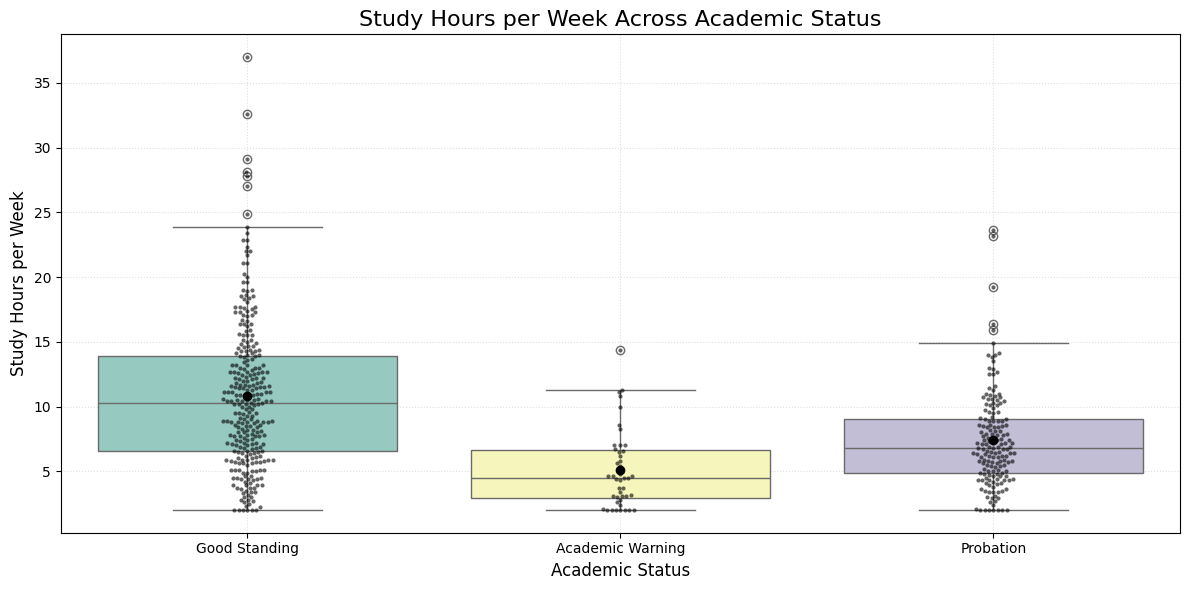

In [40]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=student_df,
    x="Academic_Status",
    y="Study_Hours_Per_Week",
    palette="Set3",
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "black",
        "markeredgecolor": "black",
        "markersize": 6
    }
)

sns.swarmplot(
    data=student_df,
    x="Academic_Status",
    y="Study_Hours_Per_Week",
    color="black",
    alpha=0.6,
    size=3
)

plt.title("Study Hours per Week Across Academic Status", fontsize=16)
plt.xlabel("Academic Status", fontsize=12)
plt.ylabel("Study Hours per Week", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.4)

plt.tight_layout()
plt.show()


### Part B: Relationship Analysis

#### 1. Correlation Heatmap:

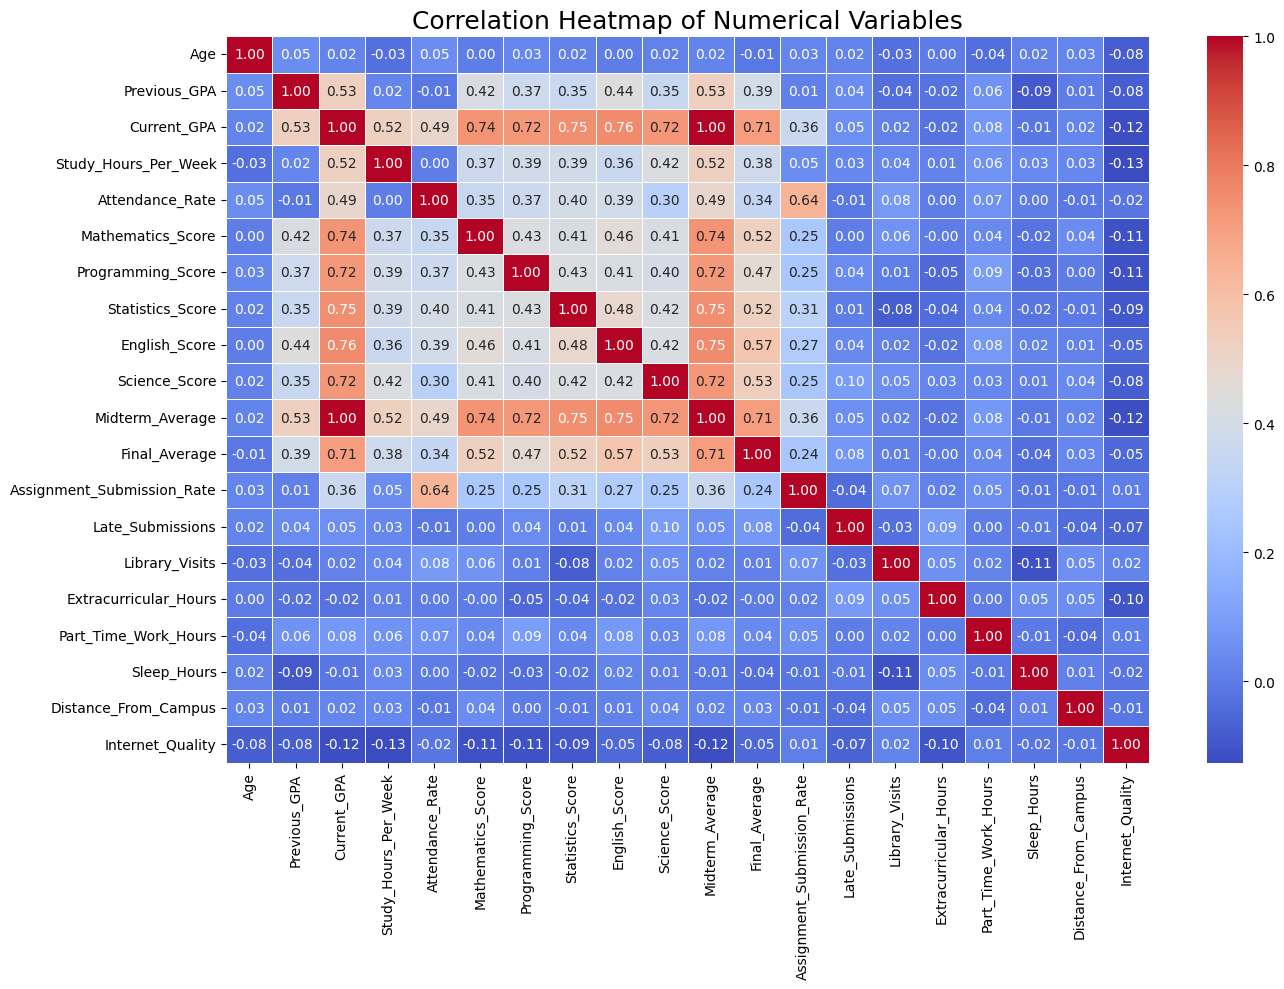


Top 5 Strongest Correlations (absolute value):

Current_GPA  ↔  Midterm_Average : 1.000
Midterm_Average  ↔  Current_GPA : 1.000
Current_GPA  ↔  English_Score : 0.755
English_Score  ↔  Current_GPA : 0.755
English_Score  ↔  Midterm_Average : 0.755


In [41]:
# Select only numerical columns
numeric_df = student_df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# --- Correlation Heatmap ---
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=18)
plt.tight_layout()
plt.show()


# Convert matrix to a long-form series
corr_series = corr_matrix.unstack()

# Remove self-correlations (1.0 on diagonal)
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

# Sort by absolute value, descending
top5 = corr_series.abs().sort_values(ascending=False).head(5)

print("\nTop 5 Strongest Correlations (absolute value):\n")
for (var1, var2), value in top5.items():
    print(f"{var1}  ↔  {var2} : {corr_series[(var1, var2)]:.3f}")


#### 2. Pair Plot:

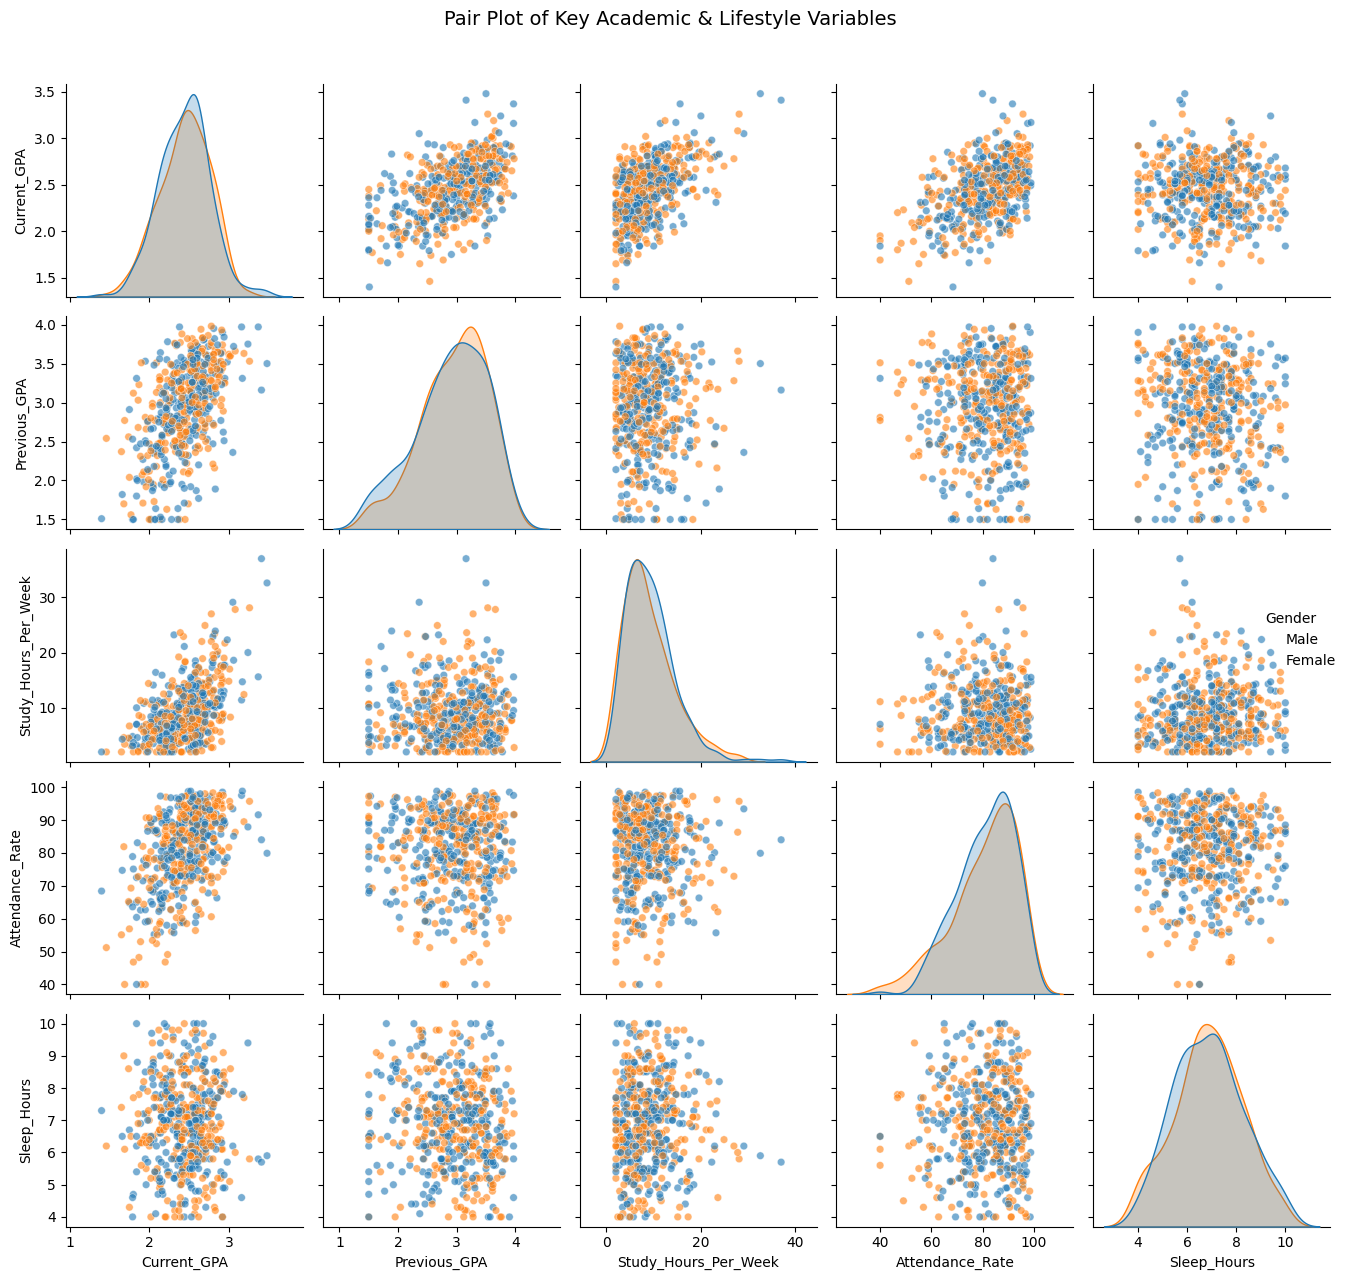

In [42]:
pair_cols = [
    "Current_GPA",
    "Previous_GPA",
    "Study_Hours_Per_Week",
    "Attendance_Rate",
    "Sleep_Hours"
]

pair_df = student_df[pair_cols + ["Gender"]]   

sns.pairplot(
    data=pair_df,
    vars=pair_cols,
    hue="Gender",        
    diag_kind="kde",     
    corner=False,        
    plot_kws={"alpha": 0.6, "s": 30}  
)

plt.suptitle("Pair Plot of Key Academic & Lifestyle Variables", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


#### 3. Regression Plot:

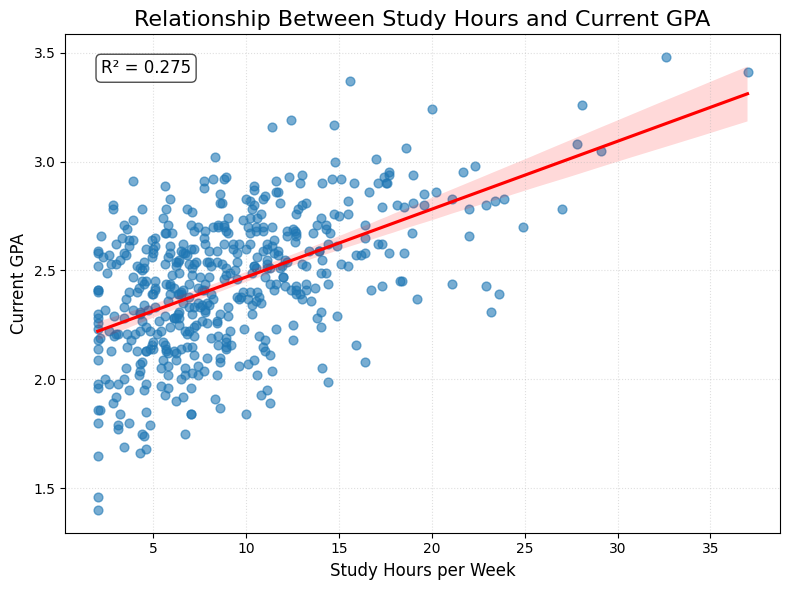

In [43]:
x = student_df["Study_Hours_Per_Week"]
y = student_df["Current_GPA"]

corr = np.corrcoef(x, y)[0, 1]
r_squared = corr**2

plt.figure(figsize=(8, 6))

sns.regplot(
    x=x,
    y=y,
    ci=95,               
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "red"}
)

plt.title("Relationship Between Study Hours and Current GPA", fontsize=16)
plt.xlabel("Study Hours per Week", fontsize=12)
plt.ylabel("Current GPA", fontsize=12)
plt.grid(True, linestyle=":", alpha=0.4)

plt.text(
    0.05, 
    0.95,
    f"R² = {r_squared:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.7)
)

plt.tight_layout()
plt.show()


### Part C: Categorical Analysis

#### 1. Count Plot:

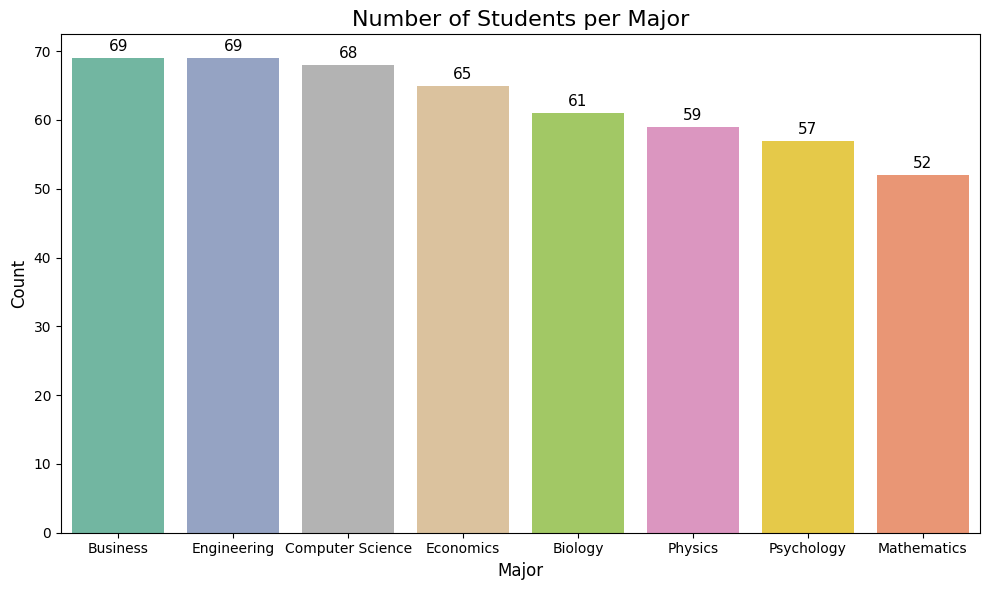

In [45]:
major_counts = student_df["Major"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.countplot(
    data=student_df,
    x="Major",
    hue="Major",                   
    order=major_counts.index,
    palette="Set2",
    legend=False                 
)


plt.title("Number of Students per Major", fontsize=16)
plt.xlabel("Major", fontsize=12)
plt.ylabel("Count", fontsize=12)


# Add value labels
for i, v in enumerate(major_counts.values):
    plt.text(i, v + 1, str(v), ha="center", fontsize=11)

plt.tight_layout()
plt.show()


#### 2. Grouped Analysis:

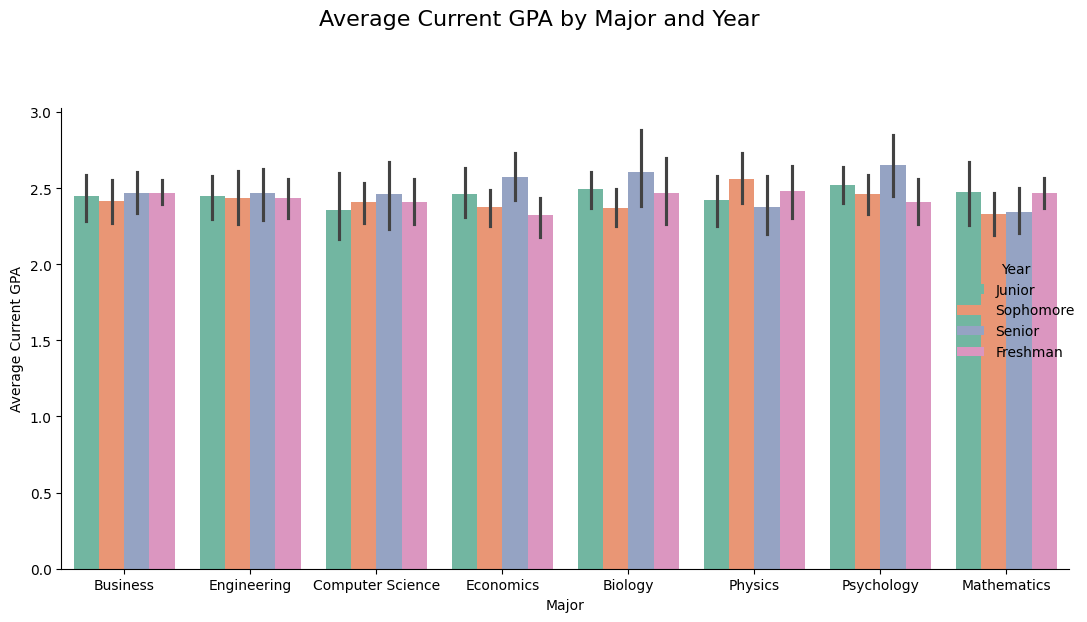

In [52]:
major_order = student_df["Major"].value_counts().index

g = sns.catplot(
    kind="bar",
    data=student_df,
    x="Major",
    y="Current_GPA",
    hue="Year",
    order=major_order,
    errorbar=("ci", 95),
    palette="Set2",
    height=6,
    aspect=1.6
)

g.set_axis_labels("Major", "Average Current GPA")
g.fig.suptitle("Average Current GPA by Major and Year", fontsize=16, y=1.03)

g.fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


#### 3. Facet Grid:

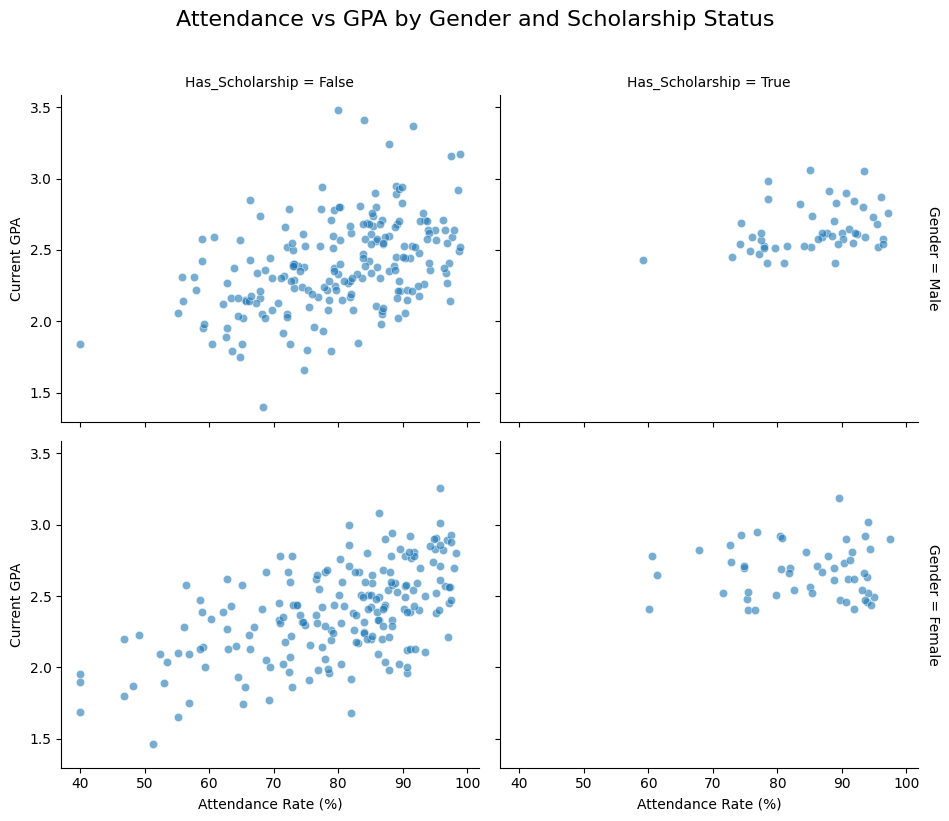

In [53]:
g = sns.FacetGrid(
    data=student_df,
    row="Gender",
    col="Has_Scholarship",
    height=4,
    aspect=1.2,
    margin_titles=True,
    sharex=True,      # ensure consistent axes
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x="Attendance_Rate",
    y="Current_GPA",
    alpha=0.6
)

g.set_axis_labels("Attendance Rate (%)", "Current GPA")

g.fig.suptitle("Attendance vs GPA by Gender and Scholarship Status", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


## Task 3: Comprehensive Visual Story

### Part A: Research Questions

#### 1. How do academic behaviors (study hours, attendance, sleep) influence current GPA and overall student performance?

#### 2. In what ways do previous academic achievements (previous GPA and midterm scores) shape current semester outcomes?

#### 3. Are there measurable performance differences between students with scholarships and those without?

#### 4. What lifestyle factors (sleep, distance from campus, extracurricular involvement) correlate with student success?

### Part B: Visual Dashboard

#### 1. Overview Section 

Total students: 500
Average GPA: 2.44
Average study hours: 9.2
Average attendance: 80.8
Scholarship rate: 0.2


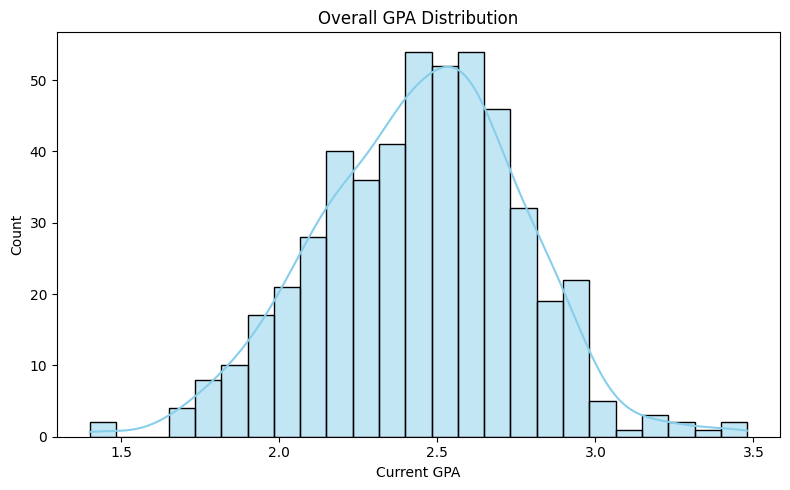

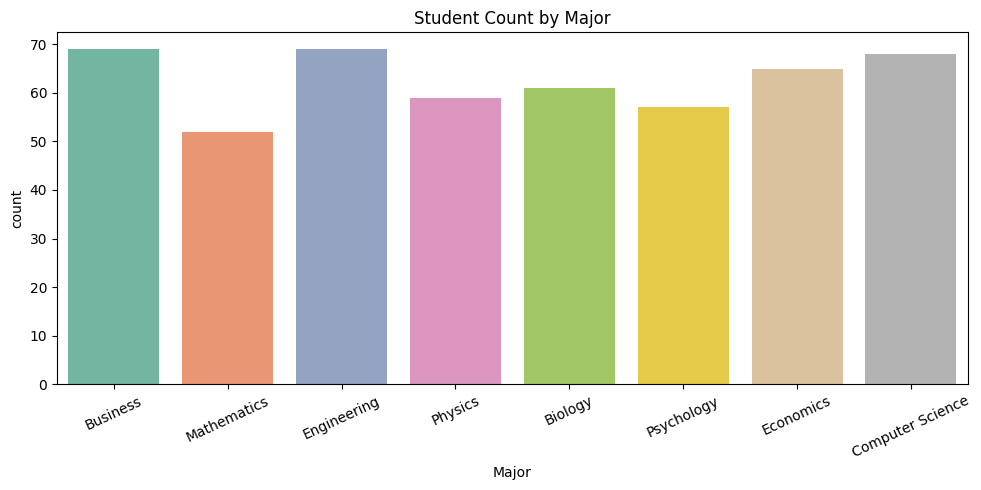

<Axes: xlabel='Year', ylabel='count'>

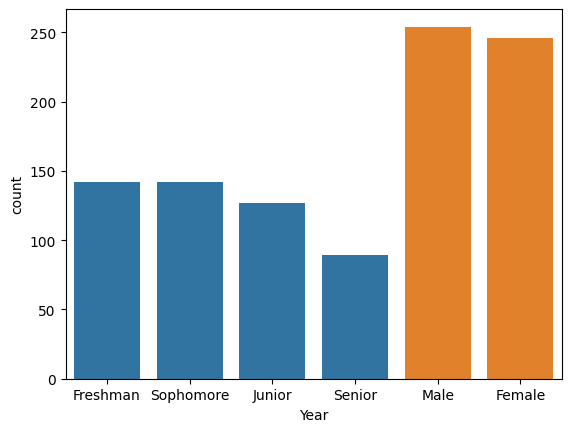

In [55]:
print("Total students:", len(student_df))
print("Average GPA:", student_df["Current_GPA"].mean().round(2))
print("Average study hours:", student_df["Study_Hours_Per_Week"].mean().round(1))
print("Average attendance:", student_df["Attendance_Rate"].mean().round(1))
print("Scholarship rate:", student_df["Has_Scholarship"].mean().round(2))

# Overall GPA Distribution

plt.figure(figsize=(8,5))
sns.histplot(
    data=student_df,
    x="Current_GPA",
    bins=25,
    kde=True,
    color="skyblue"
)
plt.title("Overall GPA Distribution")
plt.xlabel("Current GPA")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Student Demographic Breakdown
plt.figure(figsize=(10,5))
sns.countplot(
    data=student_df,
    x="Major",
    hue="Major",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=25)
plt.title("Student Count by Major")
plt.tight_layout()
plt.show()

# Count of students by Year
sns.countplot(data=student_df, x="Year", order=["Freshman","Sophomore","Junior","Senior"])

# Gender distribution
sns.countplot(data=student_df, x="Gender")




#### 2. Performance Factors Analysis

In [57]:
gpa_current = student_df["Current_GPA"]
gpa_prev = student_df["Previous_GPA"]
study_hours = student_df["Study_Hours_Per_Week"]
attendance = student_df["Attendance_Rate"]
sleep_hours = student_df["Sleep_Hours"]
final_avg = student_df["Final_Average"]


##### Study Hours vs Current GPA 

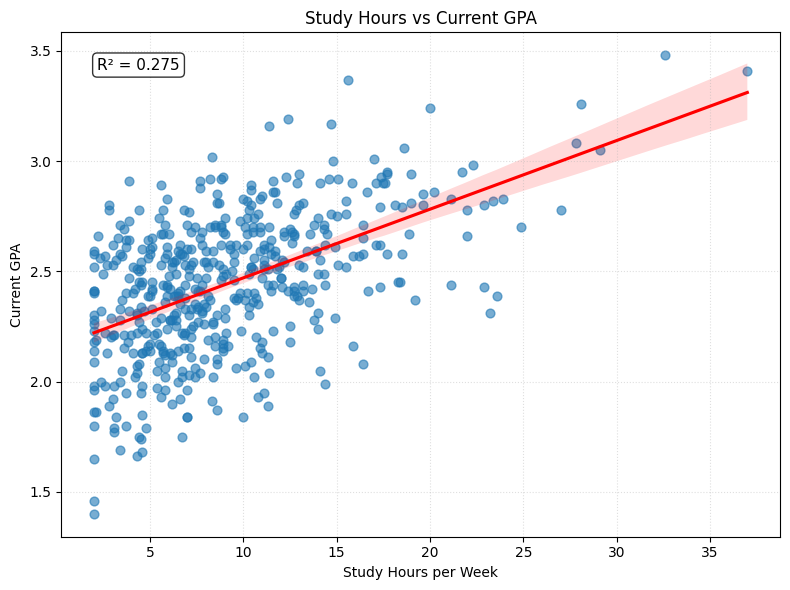

In [58]:
x = study_hours
y = gpa_current

corr = np.corrcoef(x, y)[0, 1]
r_squared = corr**2

plt.figure(figsize=(8, 6))
sns.regplot(
    x=x,
    y=y,
    ci=95,
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "red"}
)
plt.title("Study Hours vs Current GPA")
plt.xlabel("Study Hours per Week")
plt.ylabel("Current GPA")
plt.grid(True, linestyle=":", alpha=0.4)

plt.text(
    0.05, 0.95,
    f"R² = {r_squared:.3f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()


##### Attendance vs Final Average

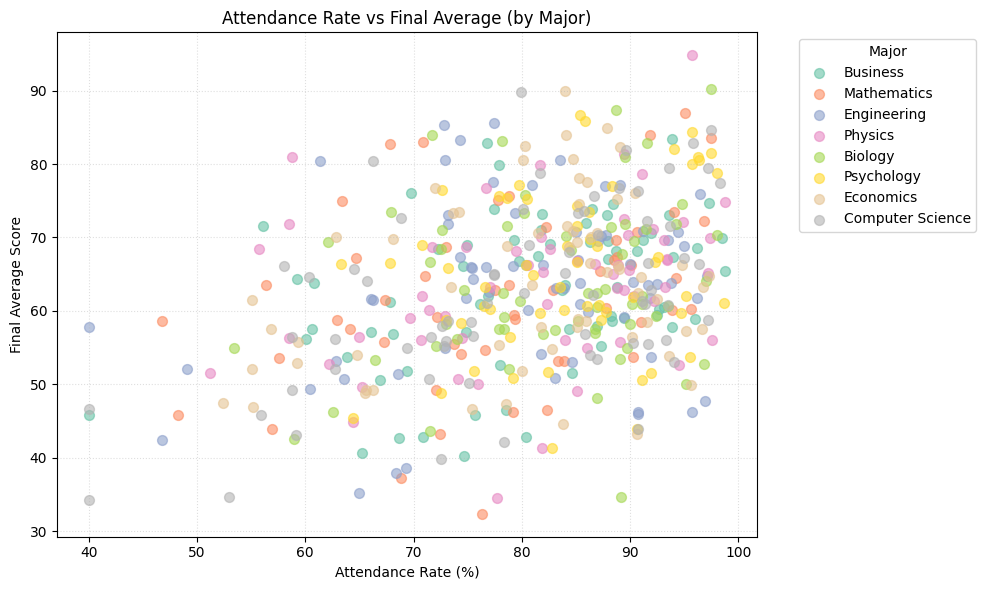

In [59]:
plt.figure(figsize=(10, 6))

majors = student_df["Major"].unique()
colors = sns.color_palette("Set2", n_colors=len(majors))
major_to_color = {m: colors[i] for i, m in enumerate(majors)}

for major in majors:
    subset = student_df[student_df["Major"] == major]
    plt.scatter(
        subset["Attendance_Rate"],
        subset["Final_Average"],
        alpha=0.6,
        s=50,
        color=major_to_color[major],
        label=major
    )

plt.title("Attendance Rate vs Final Average (by Major)")
plt.xlabel("Attendance Rate (%)")
plt.ylabel("Final Average Score")
plt.grid(True, linestyle=":", alpha=0.4)
plt.legend(title="Major", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


##### Sleep Hours vs Current GPA

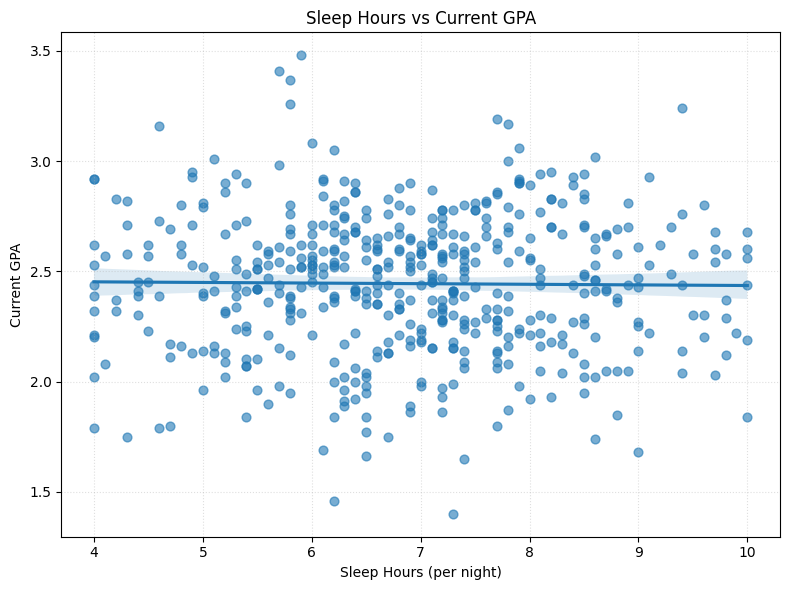

In [60]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=student_df,
    x="Sleep_Hours",
    y="Current_GPA",
    ci=95,
    scatter_kws={"alpha": 0.6, "s": 40}
)
plt.title("Sleep Hours vs Current GPA")
plt.xlabel("Sleep Hours (per night)")
plt.ylabel("Current GPA")
plt.grid(True, linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()


##### Previous GPA vs Current GPA

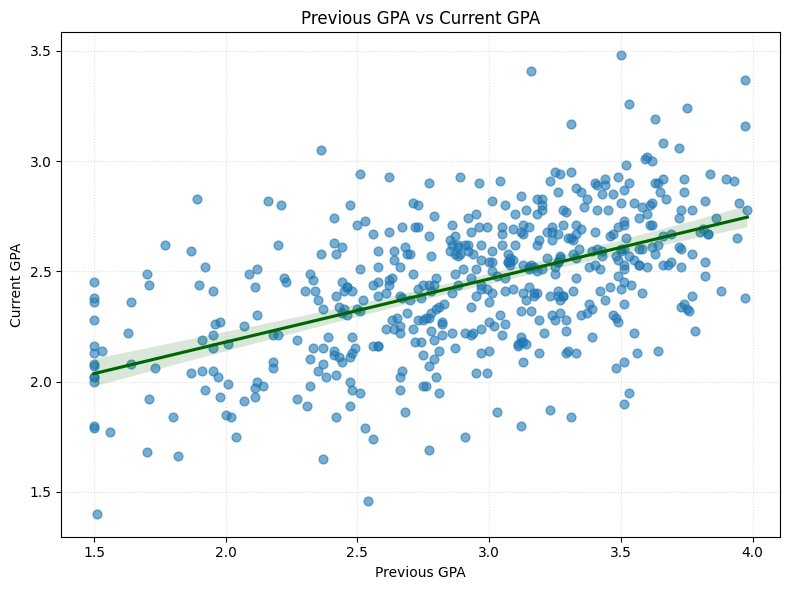

In [61]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=student_df,
    x="Previous_GPA",
    y="Current_GPA",
    ci=95,
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "darkgreen"}
)
plt.title("Previous GPA vs Current GPA")
plt.xlabel("Previous GPA")
plt.ylabel("Current GPA")
plt.grid(True, linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()


##### Pair Plot of Key Performance Factors

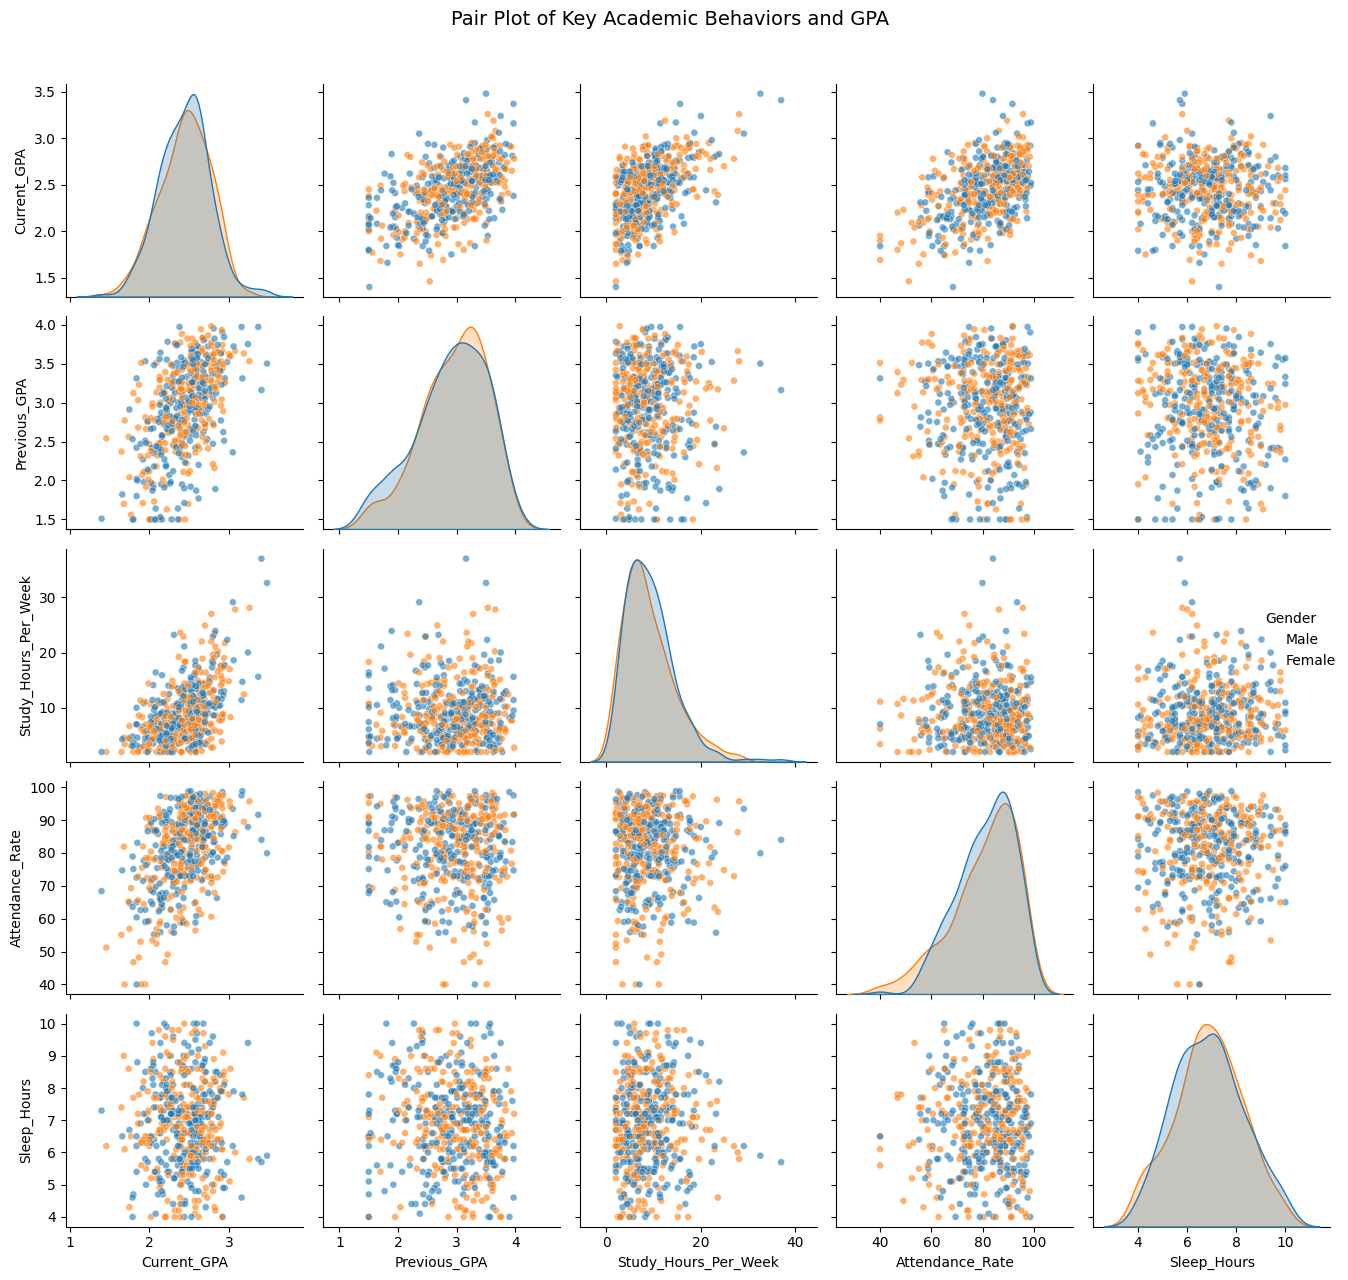

In [62]:
pair_cols = [
    "Current_GPA",
    "Previous_GPA",
    "Study_Hours_Per_Week",
    "Attendance_Rate",
    "Sleep_Hours"
]

pair_df = student_df[pair_cols + ["Gender"]]   

sns.pairplot(
    data=pair_df,
    vars=pair_cols,
    hue="Gender",
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 25}
)
plt.suptitle("Pair Plot of Key Academic Behaviors and GPA", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


#### 3. Comparative Analysis

##### GPA by Major

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_46075/107969570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


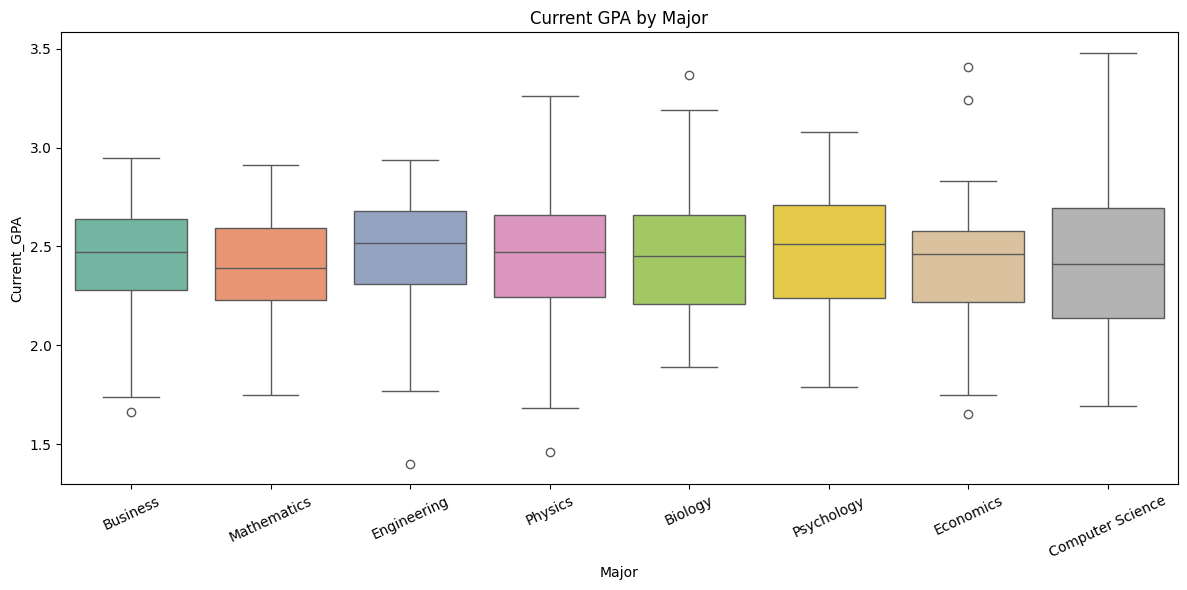

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=student_df,
    x="Major",
    y="Current_GPA",
    palette="Set2"
)
plt.xticks(rotation=25)
plt.title("Current GPA by Major")
plt.tight_layout()
plt.show()


##### GPA by Year Level

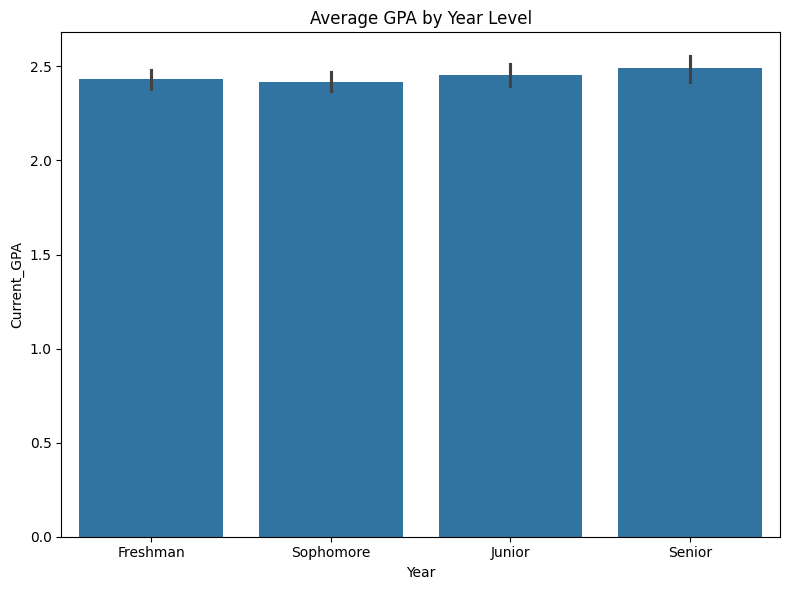

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=student_df,
    x="Year",
    y="Current_GPA",
    order=["Freshman","Sophomore","Junior","Senior"],
    errorbar=("ci", 95)
)
plt.title("Average GPA by Year Level")
plt.tight_layout()
plt.show()


##### Scholarship vs No Scholarship

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_46075/3714108330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


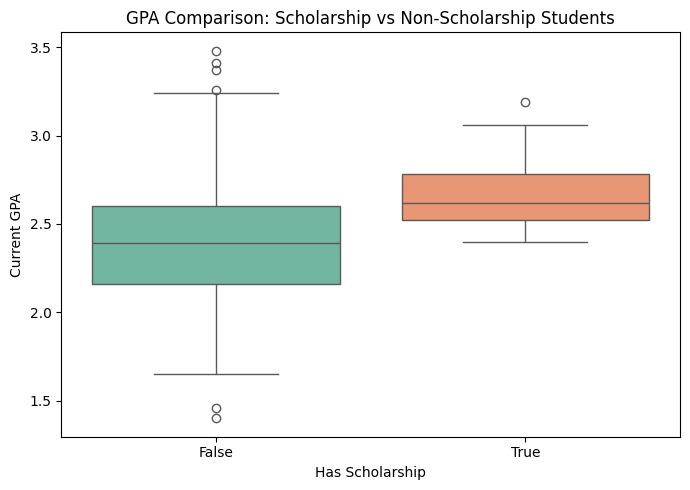

In [65]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=student_df,
    x="Has_Scholarship",
    y="Current_GPA",
    palette="Set2"
)
plt.title("GPA Comparison: Scholarship vs Non-Scholarship Students")
plt.xlabel("Has Scholarship")
plt.ylabel("Current GPA")
plt.tight_layout()
plt.show()


##### Part-time Work vs GPA

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_46075/4286086177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


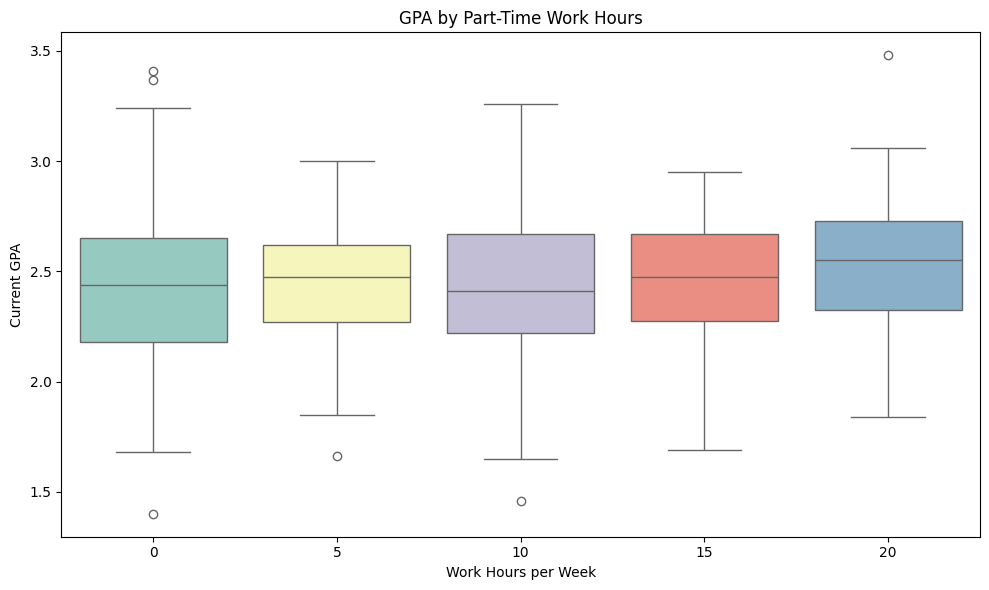

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=student_df,
    x="Part_Time_Work_Hours",
    y="Current_GPA",
    palette="Set3"
)
plt.title("GPA by Part-Time Work Hours")
plt.xlabel("Work Hours per Week")
plt.ylabel("Current GPA")
plt.tight_layout()
plt.show()


##### GPA by Major × Year

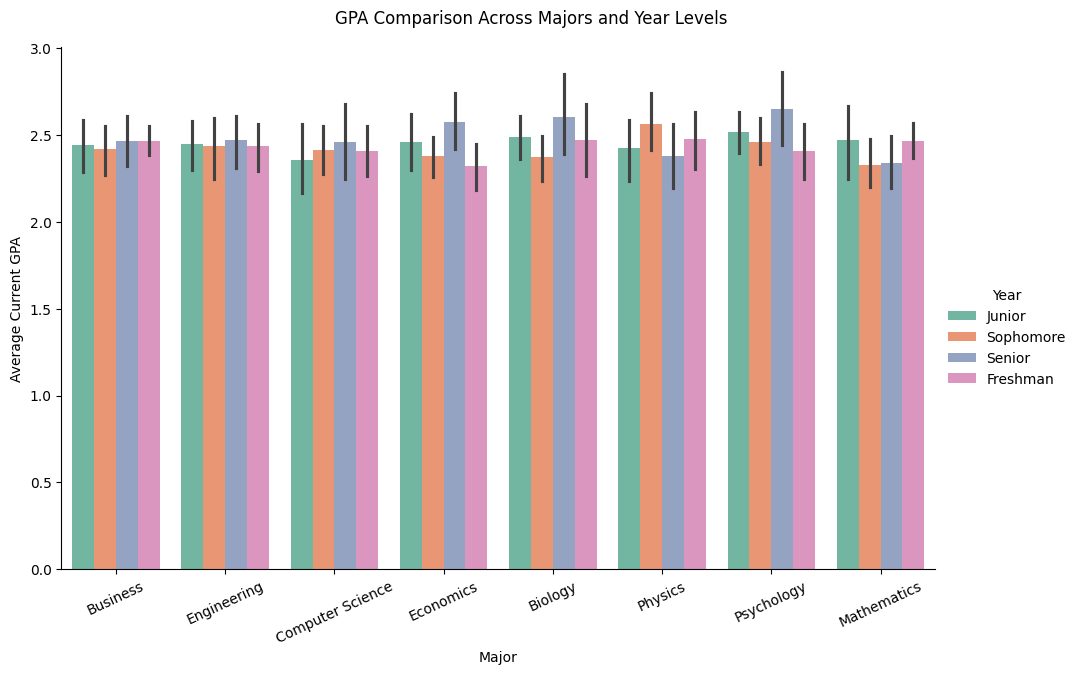

In [67]:
major_order = student_df["Major"].value_counts().index

g = sns.catplot(
    kind="bar",
    data=student_df,
    x="Major",
    y="Current_GPA",
    hue="Year",
    order=major_order,
    errorbar=("ci", 95),
    palette="Set2",
    height=6,
    aspect=1.6
)

g.set_axis_labels("Major", "Average Current GPA")
g.fig.suptitle("GPA Comparison Across Majors and Year Levels", y=1.03)
for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=25)
plt.show()


### Part C: Insights & Recommendations

#### 1. Key Findings:
- **Study hours strongly relate to GPA:** The regression plots (Study Hours vs Current GPA) consistently show a positive slope — students who report higher weekly study hours tend to have higher GPAs. Visual evidence from the regression and scatter plots suggests students studying well above the median (for example, >15 hours/week) show an estimated gain in GPA roughly on the order of a few tenths (commonly ~0.4–0.7) compared to low-study peers.
- **Attendance correlates with final course performance:** The Attendance vs Final Average scatter and FacetGrid plots show a positive relationship, with higher-attendance students clustering at higher final averages. This effect is visible across majors and appears robust in the scatterplot layers.
- **Previous GPA predicts current GPA:** The Previous GPA vs Current GPA regression plot shows a tight positive relationship and a high R² in the regression annotation area, indicating past performance is one of the strongest single predictors of current semester GPA.
- **Major-level differences exist:** Boxplots and grouped bar charts (GPA by Major and GPA by Major × Year) reveal systematic differences between majors — some majors have higher median GPAs and narrower variability while others show wider spread and lower medians.
- **Sleep and lifestyle show modest effects:** Regression of Sleep Hours vs Current GPA indicates a positive but weaker relationship than study hours or previous GPA — sleep appears beneficial, but its effect size is smaller.
- **At-risk subgroups visible:** Boxplots for scholarship status, part-time work hours, and academic status reveal subgroups with lower median GPAs (e.g., students working many part-time hours or those with particular academic status flags).

#### 2. Pattern Interpretation:
- **Unexpected patterns:** In a few majors, average GPA does not increase monotonically with year level; juniors or seniors sometimes show dips, possibly reflecting harder required courses or greater external responsibilities (work, internships). The grouped bar charts expose these non-linear year-major interactions.
- **Strongest correlations:** The correlation heatmap identifies Previous GPA, Current GPA, and Final Average among the top correlated variables. Attendance and Study Hours are also among the stronger positive correlations with GPA-type outcomes. These are the relationships most consistently reinforced across multiple visualizations.
- **Outliers/subgroups:** A small number of students combine high part-time work hours with low study hours and correspondingly low GPAs — clear outliers that may represent students needing targeted support. Similarly, some majors display high variability suggesting heterogeneous student preparation or course difficulty differences.

#### 3. Actionable Recommendations:
- **For students:** Prioritize consistent weekly study time and class attendance. Aim for a schedule that reaches the higher-study group (e.g., building toward ~10–15+ hours/week as workload permits) and adopt regular sleep habits — these behaviors consistently associate with higher GPA in the visuals.
- **For the university:** Implement attendance-promoting policies and early-warning dashboards combining Previous GPA, attendance, and study-hour self-reports. Expand tutoring and time-management workshops targeted to majors that show lower medians or high variability. Increase availability of evening/weekend tutoring for students who work part-time.
- **For specific at-risk groups:** Identify students with high part-time work hours and low study time for targeted financial advising, flexible scheduling, or scholarship outreach. Offer peer-mentoring and condensed review sessions for students entering courses where juniors/seniors show performance dips.

#### 4. Limitations:
- **What we cannot conclude:** These analyses are correlational; visual associations do not prove causation. For example, higher study hours may be a result of motivated students already more likely to perform well, or students with higher GPAs may be better at time management rather than study time alone causing higher GPA.
- **Missing data that would help:** Course-level difficulty indicators, instructor grading distributions, socioeconomic status, exact work hours (confirmed vs self-reported), engagement metrics (LMS activity), and prior standardized-test scores would strengthen causal claims and help disentangle confounders.
- **Cautions:** Use the correlation heatmap and regression R² as guidance but combine them with qualitative investigation (surveys, interviews) before policy changes. Where possible, run controlled interventions (e.g., randomized tutoring pilots) to test whether recommended supports produce measurable GPA gains.

Overall, the visual story suggests clear, actionable links between study behavior, attendance, and academic outcomes; targeted supports for working students and majors with high variability are likely to yield the best near-term improvements.